**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 1](#toc1_)    
  - [Summarized Table of Contents](#toc1_1_)    
  - [Before Starting](#toc1_2_)    
  - [Introduction](#toc1_3_)    
  - [**1. Data Preparation**](#toc1_4_)    
  - [**1.1 Load data**](#toc1_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_1_1_1_)    
    - [**1.2 Save data**](#toc1_5_2_)    
    - [**1.3 Exploratory data analysis (EDA)**](#toc1_5_3_)    
  - [**2. Feature engineering**](#toc1_6_)    
    - [Using Bag of Words](#toc1_6_1_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_6_1_1_1_)    
  - [**3. Model**](#toc1_7_)    
    - [**3.1 Decision Trees**](#toc1_7_1_)    
  - [**4. Results Evaluation**](#toc1_8_)    
        - [**>>> Exercise 3 (Take home):**](#toc1_8_1_1_1_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_8_1_1_2_)    
        - [**>>> Exercise 5 (Take home):**](#toc1_8_1_1_3_)    
  - [**5. Other things you can try**](#toc1_9_)    
  - [**6. Deep Learning**](#toc1_10_)    
    - [**6.1 Prepare data (X, y)**](#toc1_10_1_)    
    - [**6.2 Deal with categorical label (y)**](#toc1_10_2_)    
    - [**6.3 Build model**](#toc1_10_3_)    
    - [**6.4 Train**](#toc1_10_4_)    
    - [**6.5 Predict on testing data**](#toc1_10_5_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_10_5_1_1_)    
    - [Note](#toc1_10_6_)    
    - [More Information for your reference](#toc1_10_7_)    
  - [**7. Word2Vector**](#toc1_11_)    
    - [**7.1 Prepare training corpus**](#toc1_11_1_)    
    - [**7.2 Training our model**](#toc1_11_2_)    
    - [**7.3 Generating word vector (embeddings)**](#toc1_11_3_)    
    - [**7.4 Using a pre-trained w2v model**](#toc1_11_4_)    
      - [(1) Download model by yourself](#toc1_11_4_1_)    
      - [(2) Using gensim api](#toc1_11_4_2_)    
    - [**7.5 king + woman - man = ?**](#toc1_11_5_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_11_5_1_1_)    
  - [**8. Clustering: k-means**](#toc1_12_)    
      - [Basic concept](#toc1_12_1_1_)    
  - [**9. High-dimension Visualization: t-SNE and UMAP**](#toc1_13_)    
    - [**9.1 Prepare visualizing target**](#toc1_13_1_)    
    - [**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc1_13_2_)    
        - [**>>> Exercise 8 (Take home):**](#toc1_13_2_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 1](#toc0_)
In this lab's phase 1 session we will focus on the use of Neural Word Embeddings

## <a id='toc1_1_'></a>[Summarized Table of Contents](#toc0_)
- **Phase 1:**
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization


## <a id='toc1_2_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

In [2]:
# test code for environment setup
# import library
import dotenv
from google import genai
import langextract
import gensim
import tensorflow
import tensorflow_hub
import keras
import ollama
import langchain
from langchain_community import utils
from langchain_core import prompts
from langchain_google_genai import chat_models
from bs4 import BeautifulSoup
import chromadb
import gradio
import jupyter
import sklearn
import pandas
import numpy
import matplotlib
import plotly
import seaborn
import nltk
import umap
import pymupdf
%matplotlib inline
print("gensim: " + gensim.__version__)
print("tensorflow: " + tensorflow.__version__)
print("keras: " + keras.__version__)

/Users/chinnngz/Documents/labs/DM2025Labs/DM2025-Lab2-Exercise/.venv/lib/python3.11/site-packages/tensorflow_hub/__init__.py:61: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version


gensim: 4.3.3
tensorflow: 2.20.0
keras: 3.11.3


---
## <a id='toc1_3_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](./pics/pic0.png)

---
## <a id='toc1_4_'></a>[**1. Data Preparation**](#toc0_)

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

---
## <a id='toc1_5_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [3]:
anger_train.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [5]:
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [6]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [7]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [8]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
##### <a id='toc1_5_1_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


1. plot word frequency for top 30 words in train dataset. 

In [32]:
# Answer here
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
train_counts = count_vect.fit_transform(train_df.text)
print(train_counts[0])

  (0, 9711)	1
  (0, 9659)	1
  (0, 9119)	2
  (0, 4070)	1
  (0, 10051)	2
  (0, 9872)	1
  (0, 10059)	1
  (0, 2427)	1
  (0, 3681)	1
  (0, 6513)	1
  (0, 6384)	1
  (0, 1482)	1
  (0, 5091)	1
  (0, 4221)	1
  (0, 9114)	1
  (0, 5552)	1
  (0, 976)	1
  (0, 8930)	1
  (0, 9220)	1
  (0, 9506)	1
  (0, 1011)	1
  (0, 9634)	1
  (0, 3391)	1


[nltk_data] Downloading package punkt to /Users/chinnngz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/chinnngz/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [33]:
analyze = count_vect.build_analyzer()
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '00pm', '00tiffanyr', '01', '02', '03', '0303', '034',
       '04'], dtype=object)

In [34]:
train_counts.shape

(3613, 10115)

In [35]:
# transform text data
import numpy as np
term_frequencies = []
for j in range(0,train_counts.shape[1]):
    term_frequencies.append(sum(train_counts[:,j].toarray()))

term_frequencies = np.asarray(train_counts.sum(axis=0))[0]

term_frequencies[0]


2

/var/folders/kj/zymg76s547s1sqs87rzd5t400000gn/T/ipykernel_53332/1121404637.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[top_order], rotation = 90);


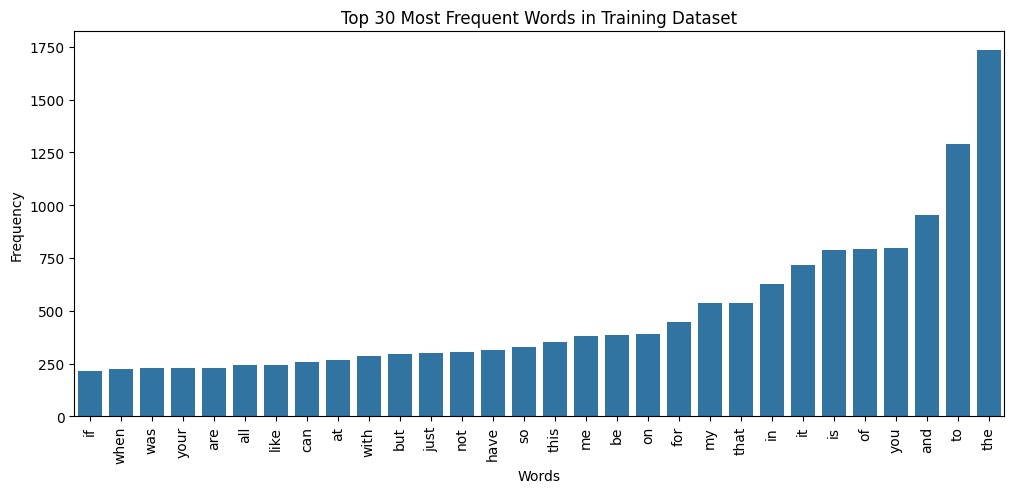

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(12, 5))
top_N = 30
top_order = np.argsort(term_frequencies)[-top_N:]
g = sns.barplot(x=count_vect.get_feature_names_out()[top_order], y=term_frequencies[top_order])
g.set_title("Top 30 Most Frequent Words in Training Dataset")
g.set_xlabel("Words")
g.set_ylabel("Frequency")
g.set_xticklabels(count_vect.get_feature_names_out()[top_order], rotation = 90);

2. plot word frequency for top 30 words in train dataset. 
- Use the same vocabulary learned from the training data to transform the test data into a term-frequency matrix with the same feature dimensions.

  (0, 976)	1
  (0, 2380)	1
  (0, 4762)	1
  (0, 5865)	1
  (0, 6235)	1
  (0, 9678)	2
  (0, 9916)	1
  (0, 9933)	1


/var/folders/kj/zymg76s547s1sqs87rzd5t400000gn/T/ipykernel_53332/130726861.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[top_order], rotation = 90);


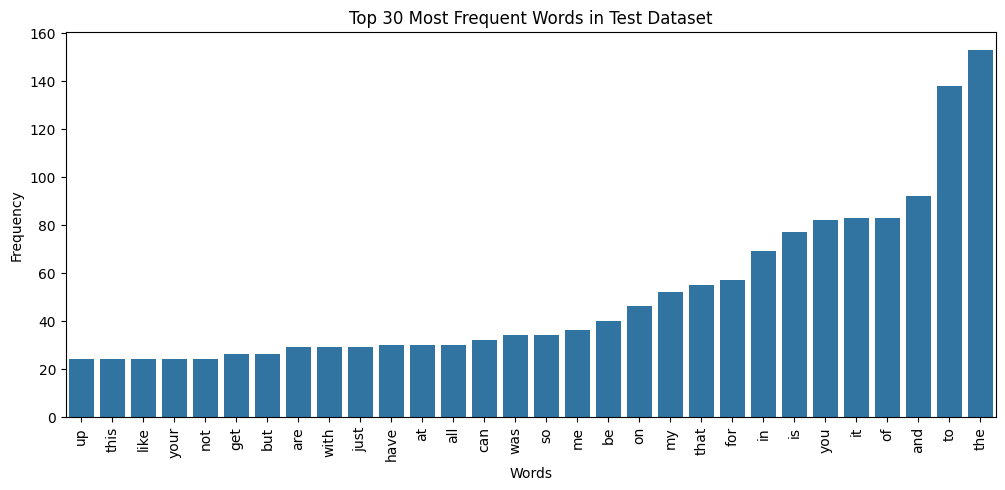

In [37]:
test_counts = count_vect.transform(test_df.text)
print(test_counts[0])
term_frequencies_test = []
for j in range(0,test_counts.shape[1]):
    term_frequencies_test.append(sum(test_counts[:,j].toarray()))

term_frequencies_test = np.asarray(test_counts.sum(axis=0))[0]
plt.subplots(figsize=(12, 5))
top_N = 30
top_order = np.argsort(term_frequencies_test)[-top_N:]
g = sns.barplot(x=count_vect.get_feature_names_out()[top_order], y=term_frequencies_test[top_order])
g.set_title("Top 30 Most Frequent Words in Test Dataset")
g.set_xlabel("Words")
g.set_ylabel("Frequency")
g.set_xticklabels(count_vect.get_feature_names_out()[top_order], rotation = 90);

---
### <a id='toc1_5_2_'></a>[**1.2 Save data**](#toc0_)

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [38]:
# save to pickle file
train_df.to_pickle("./data/train_df.pkl") 
test_df.to_pickle("./data/test_df.pkl")

In [39]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./data/train_df.pkl")
test_df = pd.read_pickle("./data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### <a id='toc1_5_3_'></a>[**1.3 Exploratory data analysis (EDA)**](#toc0_)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [40]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

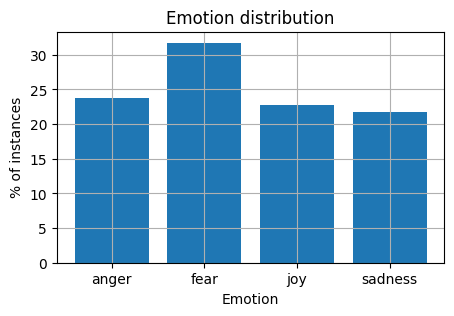

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## <a id='toc1_6_'></a>[**2. Feature engineering**](#toc0_)
### <a id='toc1_6_1_'></a>[Using Bag of Words](#toc0_)
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [42]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [43]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [44]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [45]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [46]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [47]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [48]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [49]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

/Users/chinnngz/Documents/labs/DM2025Labs/DM2025-Lab2-Exercise/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [50]:
train_data_BOW_features_500.toarray()

array([[1, 2, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [51]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [52]:
"😂" in feature_names_500

True

---
##### <a id='toc1_6_1_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [53]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

# build TF-IDF vectorizer with 1000 features
TFIDF_vectorizer = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

# learn vocabulary and idf from training data
TFIDF_vectorizer.fit(train_df['text'])

# transform training and testing data
train_data_TFIDF_features = TFIDF_vectorizer.transform(train_df['text'])
test_data_TFIDF_features = TFIDF_vectorizer.transform(test_df['text'])

# check dimension
print(train_data_TFIDF_features.shape)
print(test_data_TFIDF_features.shape)

# observe some feature names
feature_names_TFIDF = TFIDF_vectorizer.get_feature_names_out()
feature_names_TFIDF[100:110]

(3613, 1000)
(347, 1000)


array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

---
## <a id='toc1_7_'></a>[**3. Model**](#toc0_)
### <a id='toc1_7_1_'></a>[**3.1 Decision Trees**](#toc0_)
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [54]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [55]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['fear', 'joy', 'joy', 'anger', 'sadness', 'anger', 'joy', 'fear',
       'joy', 'fear'], dtype=object)

---
## <a id='toc1_8_'></a>[**4. Results Evaluation**](#toc0_)

Now we will check the results of our model's performance

In [57]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [58]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [59]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [60]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

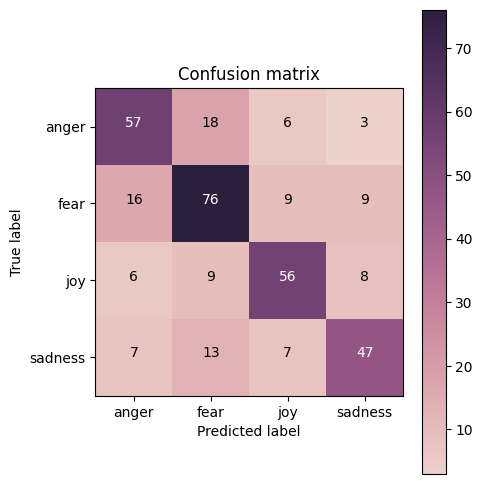

In [61]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
##### <a id='toc1_8_1_1_1_'></a>[**>>> Exercise 3 (Take home):**](#toc0_)
Can you interpret the results above? What do they mean?

In [62]:
# Answer here
"""
1. accuracy & class-wise performance: The model shows clear overfitting: it performs almost perfectly on training data 
  but generalizes poorly to unseen test samples.
    - Anger: moderate accuracy, some confusion with other emotions.
    - Fear: fairly balanced, but not very strong.
    - Joy: best performing class, model recognizes joy well.
    - Sadness: lower recall, some sadness misclassified as other emotions.
Overall, the model achieves reasonable accuracy (~68%) but is clearly overfitted.
2. Confusion Matrix Interpretation: 'Fear' has the highest correct count, while 'Anger' is often confused with 'Fear'. 
'Sadness' is sometimes misclassified as 'Fear', and 'Joy' is well predicted (56 correct) but occasionally mistaken for 'Fear' or 'Sadness'.
Major confusion occurs between negative emotions, while the positive emotion ('Joy') is easier to identify.
Overall accuracy (~68%) indicates decent but improvable performance.
"""

"\n1. accuracy & class-wise performance: The model shows clear overfitting: it performs almost perfectly on training data \n  but generalizes poorly to unseen test samples.\n    - Anger: moderate accuracy, some confusion with other emotions.\n    - Fear: fairly balanced, but not very strong.\n    - Joy: best performing class, model recognizes joy well.\n    - Sadness: lower recall, some sadness misclassified as other emotions.\nOverall, the model achieves reasonable accuracy (~68%) but is clearly overfitted.\n2. Confusion Matrix Interpretation: 'Fear' has the highest correct count, while 'Anger' is often confused with 'Fear'. \n'Sadness' is sometimes misclassified as 'Fear', and 'Joy' is well predicted (56 correct) but occasionally mistaken for 'Fear' or 'Sadness'.\nMajor confusion occurs between negative emotions, while the positive emotion ('Joy') is easier to identify.\nOverall accuracy (~68%) indicates decent but improvable performance.\n"

---
##### <a id='toc1_8_1_1_2_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [63]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)

y_train_pred_nb = NB_model.predict(X_train)
y_test_pred_nb = NB_model.predict(X_test)

acc_train_nb = accuracy_score(y_train, y_train_pred_nb)
acc_test_nb = accuracy_score(y_test, y_test_pred_nb)

print("Training accuracy: {:.2f}".format(acc_train_nb))
print("Testing accuracy: {:.2f}".format(acc_test_nb))

print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred_nb))


Training accuracy: 0.79
Testing accuracy: 0.70

Classification Report:

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



In [65]:
"""
1. The model generalizes well, with only a small gap between training and testing accuracy. 
   This indicates much less overfitting compared to the Decision Tree (0.99 → 0.68).

2. Class-wise results:
   - "Anger" shows moderate performance but still has some confusion with other emotions.
   - "Fear" is the best-performing class.
   - "Joy" has good precision but slightly lower recall, with some joyful texts missed.
   - "Sadness" has the lowest recall and is occasionally confused with other negative emotions.

Overall, Naive Bayes provides better generalization and balanced results. 
It performs slightly better than the Decision Tree and avoids overfitting. 
However, it still struggles to distinguish semantically similar negative emotions.
"""


'\n1. The model generalizes well, with only a small gap between training and testing accuracy. \n   This indicates much less overfitting compared to the Decision Tree (0.99 → 0.68).\n\n2. Class-wise results:\n   - "Anger" shows moderate performance but still has some confusion with other emotions.\n   - "Fear" is the best-performing class.\n   - "Joy" has good precision but slightly lower recall, with some joyful texts missed.\n   - "Sadness" has the lowest recall and is occasionally confused with other negative emotions.\n\nOverall, Naive Bayes provides better generalization and balanced results. \nIt performs slightly better than the Decision Tree and avoids overfitting. \nHowever, it still struggles to distinguish semantically similar negative emotions.\n'

[[55 15  5  9]
 [ 9 85  5 11]
 [11  6 56  6]
 [12 10  6 46]]


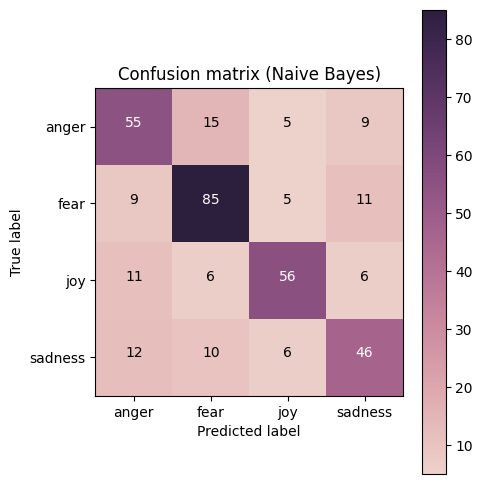

In [66]:
## Visualize confusion matrix for Naive Bayes model
from sklearn.metrics import confusion_matrix

cm_nb = confusion_matrix(y_true=y_test, y_pred=y_test_pred_nb) 
print(cm_nb)

plot_confusion_matrix(cm_nb, classes=my_tags, title='Confusion matrix (Naive Bayes)')


In [67]:
"""
Most of the predictions fall along the diagonal, indicating that the classifier correctly recognizes a large portion of each emotion type. 
The model performs best on the 'fear' class, with 85 correctly classified instances. 
This suggests that the probabilistic nature of Naive Bayes effectively captures words commonly associated with fear expressions. 
The 'joy' class also shows stable performance, achieving a similar number of correct predictions (56) as before, but with fewer extreme errors. 
The 'anger' and 'sadness' classes still show some confusion with other negative emotions, especially between 'anger' and 'fear' or between 'fear' and 'sadness'. 
This overlap is likely due to shared emotional vocabulary across these categories. 

In summary, the Naive Bayes classifier achieves clearer separation between emotion categories and reduces overfitting. 
Although it still struggles with semantically similar negative emotions, its overall prediction pattern is more stable and reliable.
"""

"\nMost of the predictions fall along the diagonal, indicating that the classifier correctly recognizes a large portion of each emotion type. \nThe model performs best on the 'fear' class, with 85 correctly classified instances. \nThis suggests that the probabilistic nature of Naive Bayes effectively captures words commonly associated with fear expressions. \nThe 'joy' class also shows stable performance, achieving a similar number of correct predictions (56) as before, but with fewer extreme errors. \nThe 'anger' and 'sadness' classes still show some confusion with other negative emotions, especially between 'anger' and 'fear' or between 'fear' and 'sadness'. \nThis overlap is likely due to shared emotional vocabulary across these categories. \n\nIn summary, the Naive Bayes classifier achieves clearer separation between emotion categories and reduces overfitting. \nAlthough it still struggles with semantically similar negative emotions, its overall prediction pattern is more stable an

---
##### <a id='toc1_8_1_1_3_'></a>[**>>> Exercise 5 (Take home):**](#toc0_)

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [68]:
# Answer here
"""
The Decision Tree model achieved very high training accuracy (0.99) but low testing accuracy (0.68), showing overfitting. 
In contrast, the Naive Bayes model reached 0.79 training and 0.70 testing accuracy, indicating better generalization. 
This difference arises from their learning mechanisms: 
Decision Tree memorizes specific patterns in high-dimensional sparse data, while Naive Bayes models word frequencies probabilistically under an independence assumption. 
As a result, Naive Bayes performs more consistently across classes—especially for 'fear'—and avoids the instability observed in theDecision Tree. 
Overall, Naive Bayes is theoretically and empirically more suitable for Bag-of-Words text classification.
"""


"\nThe Decision Tree model achieved very high training accuracy (0.99) but low testing accuracy (0.68), showing overfitting. \nIn contrast, the Naive Bayes model reached 0.79 training and 0.70 testing accuracy, indicating better generalization. \nThis difference arises from their learning mechanisms: \nDecision Tree memorizes specific patterns in high-dimensional sparse data, while Naive Bayes models word frequencies probabilistically under an independence assumption. \nAs a result, Naive Bayes performs more consistently across classes—especially for 'fear'—and avoids the instability observed in theDecision Tree. \nOverall, Naive Bayes is theoretically and empirically more suitable for Bag-of-Words text classification.\n"

---

## <a id='toc1_9_'></a>[**5. Other things you can try**](#toc0_)

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## <a id='toc1_10_'></a>[**6. Deep Learning**](#toc0_)

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![pic1.png](./pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


---
### <a id='toc1_10_1_'></a>[**6.1 Prepare data (X, y)**](#toc0_)

In [69]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [70]:
import keras

In [72]:
BOW_500.transform(test_df['text'])

<347x500 sparse matrix of type '<class 'numpy.int64'>'
	with 4103 stored elements in Compressed Sparse Row format>

---
### <a id='toc1_10_2_'></a>[**6.2 Deal with categorical label (y)**](#toc0_)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [73]:
# deal with label (string -> one-hot)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 3182    sadness
2512        joy
2057        joy
1141       fear
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


In [74]:
y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)




## After convert
y_train[0:4]:
 [[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


---
### <a id='toc1_10_3_'></a>[**6.3 Build model**](#toc0_)

In [75]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](./pics/pic2.png)

In [76]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

---
### <a id='toc1_10_4_'></a>[**6.4 Train**](#toc0_)

In [77]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3761 - loss: 1.3261 - val_accuracy: 0.4236 - val_loss: 1.2706
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6499 - loss: 0.9644 - val_accuracy: 0.6282 - val_loss: 0.9035
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7971 - loss: 0.5749 - val_accuracy: 0.7061 - val_loss: 0.7947
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8447 - loss: 0.4195 - val_accuracy: 0.6945 - val_loss: 0.7952
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8826 - loss: 0.3337 - val_accuracy: 0.6772 - val_loss: 0.8105
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9045 - loss: 0.2709 - val_accuracy: 0.6916 - val_loss: 0.8531
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.9231 - loss: 0.2322 - val_accuracy: 0.6744 - val_loss: 0.8738
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9380 - loss: 0.1930 - val_accuracy: 

---
### <a id='toc1_10_5_'></a>[**6.5 Predict on testing data**](#toc0_)

In [78]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[5.8049805e-05, 7.9462057e-01, 2.0440848e-01, 9.1286114e-04],
       [4.0392511e-05, 3.7086285e-03, 9.9621534e-01, 3.5620273e-05],
       [6.4288764e-03, 9.4014496e-01, 3.8293965e-02, 1.5132188e-02],
       [9.9820644e-01, 5.1118641e-05, 1.7236911e-03, 1.8753703e-05],
       [2.7693363e-07, 6.6852385e-07, 2.4914381e-03, 9.9750757e-01]],
      dtype=float32)

In [79]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['fear', 'joy', 'fear', 'anger', 'sadness'], dtype=object)

In [80]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.65


In [81]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.376142,1.326134,0.423631,1.270589
1,1,0.649875,0.964361,0.628242,0.903497
2,2,0.797122,0.574861,0.706052,0.794675
3,3,0.844727,0.419495,0.694524,0.795181
4,4,0.882646,0.333686,0.677233,0.810529
5,5,0.904512,0.270896,0.691643,0.853090
6,6,0.923056,0.232191,0.674352,0.873831
7,7,0.938002,0.193048,0.671470,0.967640
8,8,0.948519,0.167468,0.674352,1.010872
9,9,0.957930,0.145057,0.694524,1.039870


---
##### <a id='toc1_10_5_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![pic3.png](./pics/pic3.png)  ![pic4.png](./pics/pic4.png)


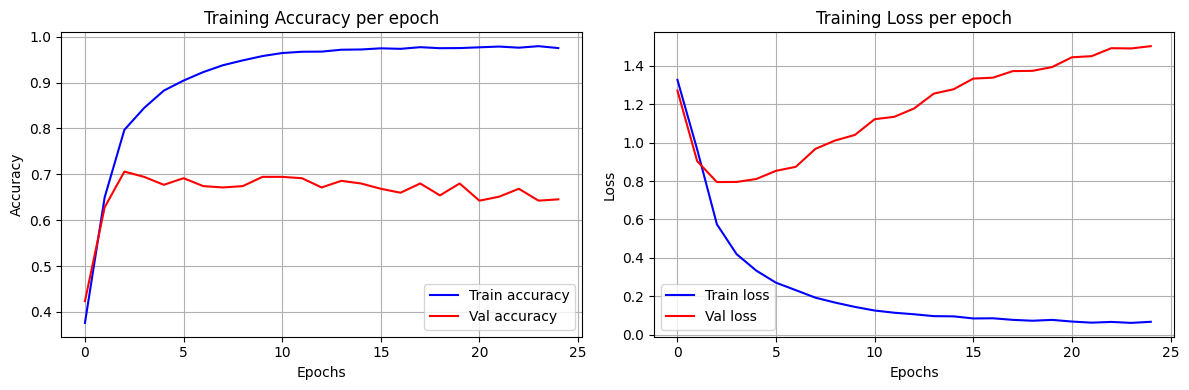

In [83]:
# Answer here
import matplotlib.pyplot as plt
import pandas as pd

# Load training log file
training_log = pd.read_csv("logs/training_log.csv")

# Create a figure with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot accuracy curves (Train vs Validation)
ax1.plot(training_log['accuracy'], color='blue', label='Train accuracy')
ax1.plot(training_log['val_accuracy'], color='red', label='Val accuracy')
ax1.set_title('Training Accuracy per epoch')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# Plot loss curves (Train vs Validation)
ax2.plot(training_log['loss'], color='blue', label='Train loss')
ax2.plot(training_log['val_loss'], color='red', label='Val loss')
ax2.set_title('Training Loss per epoch')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

# Adjust spacing and show the figure
plt.tight_layout()




In [92]:
# interpret the graph
"""
The plots show a clear case of overfitting.
Training accuracy keeps increasing and almost reaches 100%,
while validation accuracy plateaus around 0.7 and even decreases slightly.
At the same time, training loss keeps decreasing but validation loss rises steadily.
This means the model learns the training data too well but fails to generalize to unseen samples 
a typical symptom of overfitting discussed in class.
"""

'\nThe plots show a clear case of overfitting.\nTraining accuracy keeps increasing and almost reaches 100%,\nwhile validation accuracy plateaus around 0.7 and even decreases slightly.\nAt the same time, training loss keeps decreasing but validation loss rises steadily.\nThis means the model learns the training data too well but fails to generalize to unseen samples \na typical symptom of overfitting discussed in class.\n'

---

### <a id='toc1_10_6_'></a>[Note](#toc0_)

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### <a id='toc1_10_7_'></a>[More Information for your reference](#toc0_)

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## <a id='toc1_11_'></a>[**7. Word2Vector**](#toc0_)

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

---
### <a id='toc1_11_1_'></a>[**7.1 Prepare training corpus**](#toc0_)

In [84]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
3182,40355,We want to help you with your #depression. Giv...,"[We, want, to, help, you, with, your, #, depre..."
2512,30508,He maketh the #barren woman to keep house &amp...,"[He, maketh, the, #, barren, woman, to, keep, ..."
2057,30053,Food that gets delivered 😍🙌🏻 #cheering #happy,"[Food, that, gets, delivered, 😍🙌🏻, #, cheering..."
1141,20284,We're all in D. T. (Discipleship training or d...,"[We, 're, all, in, D., T., (, Discipleship, tr..."
1277,20420,@LonelyGoomba UK cops have an issue fearing in...,"[@, LonelyGoomba, UK, cops, have, an, issue, f..."


In [85]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['We', 'want', 'to', 'help', 'you', 'with', 'your', '#', 'depression', '.', 'Give', 'our', 'office', 'a', 'call', 'to', 'learn', 'how', '#', 'TMS', 'may', 'be', 'the', 'treatment', 'you', "'ve", 'been', 'waiting', 'for', '!']),
       list(['He', 'maketh', 'the', '#', 'barren', 'woman', 'to', 'keep', 'house', '&', 'amp', ';', 'to', 'be', 'a', '#', 'joyful', 'mother', 'of', 'children\\nPraise', 'ye', 'the', 'Lord\\nPsa113:9']),
       list(['Food', 'that', 'gets', 'delivered', '😍🙌🏻', '#', 'cheering', '#', 'happy'])],
      dtype=object)

---
### <a id='toc1_11_2_'></a>[**7.2 Training our model**](#toc0_)

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [86]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

---
### <a id='toc1_11_3_'></a>[**7.3 Generating word vector (embeddings)**](#toc0_)

In [87]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.2616942 ,  0.35640657, -0.3439228 , -0.14986113,  0.12886016,
       -1.2560062 ,  0.36375284,  1.1859089 , -0.29827365, -0.4691072 ,
       -0.61301583, -0.8868555 , -0.40057465,  0.3344743 , -0.00702245,
       -0.34413505,  0.540135  , -0.14337333,  0.20631605, -1.0811993 ,
        0.58175623,  0.79166543,  0.9749423 ,  0.01962134,  0.01578449,
       -0.13018015, -0.11640472,  0.5424574 , -0.4488184 ,  0.2594309 ,
        0.26742908, -0.2902642 ,  0.6713836 , -0.80838746, -0.15355898,
        0.36200735,  0.24801932, -0.10658394, -0.04297151, -0.16608328,
        0.45435506,  0.02146602, -0.2572229 , -0.33424312,  0.79910886,
       -0.10419465, -0.38373026,  0.26007068,  0.6694113 ,  0.36018655,
       -0.5112416 , -0.42537767, -0.11060283,  0.01362789, -0.3087554 ,
       -0.19506864,  0.24778235, -0.05014819, -0.2471716 ,  0.2751991 ,
       -0.01762231,  0.13389795,  0.17614086, -0.02732887, -0.6841012 ,
        0.8292737 ,  0.5550348 ,  0.5870146 , -1.2934953 ,  0.66

In [88]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('Be', 0.9272959232330322),
 ('birthday', 0.9213446974754333),
 ('cats', 0.9135388731956482),
 ('smile', 0.9089896082878113),
 ('help', 0.908296525478363),
 ('right', 0.9055888652801514),
 ('Makes', 0.9054901599884033),
 ('memories😊', 0.8997800350189209),
 ('happier', 0.8985876441001892),
 ('border', 0.8983979225158691)]

---
### <a id='toc1_11_4_'></a>[**7.4 Using a pre-trained w2v model**](#toc0_)

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### <a id='toc1_11_4_1_'></a>[(1) Download model by yourself](#toc0_)

Download from this link: [Kaggle | Google News Vectors](https://www.kaggle.com/datasets/didiersalazar/google-news-vectors)

Copy the data `GoogleNews-vectors-negative300.bin` into the following folder directory: `GoogleNews/`

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [89]:
from gensim.models import KeyedVectors
# IMPORTANT: Please make sure that you have correctly downloaded the file and put it in the correct directory
## Note: this model is huge, this will take some time ...
model_path = "./GoogleNews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### <a id='toc1_11_4_2_'></a>[(2) Using gensim api](#toc0_)

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [90]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

[==================================================] 100.0% 104.8/104.8MB downloaded
load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.9336148500442505),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158350825309753),
 ('thanks', 0.9150084853172302),
 ('merry', 0.9053248763084412),
 ('bless', 0.902732253074646),
 ('wish', 0.9013165235519409)]

---
### <a id='toc1_11_5_'></a>[**7.5 king + woman - man = ?**](#toc0_)

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [91]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411403656006)]

---
##### <a id='toc1_11_5_1_1_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [94]:
# Answer here
"""
To use word vectors for sentence representation, we can:
1. Convert each word in the sentence into its embedding vector.
2. Combine all word vectors to form a single sentence vector.

Common methods:
- Simple average of all word embeddings.
- Weighted average (e.g., TF-IDF weighting).
- Feed the sequence of word embeddings into models like RNN, LSTM, or Transformer to learn contextual relationships.

This allows us to represent sentences (not just words) as numerical vectors suitable for machine learning models.
"""


'\nTo use word vectors for sentence representation, we can:\n1. Convert each word in the sentence into its embedding vector.\n2. Combine all word vectors to form a single sentence vector.\n\nCommon methods:\n- Simple average of all word embeddings.\n- Weighted average (e.g., TF-IDF weighting).\n- Feed the sequence of word embeddings into models like RNN, LSTM, or Transformer to learn contextual relationships.\n\nThis allows us to represent sentences (not just words) as numerical vectors suitable for machine learning models.\n'

---
## <a id='toc1_12_'></a>[**8. Clustering: k-means**](#toc0_)

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### <a id='toc1_12_1_1_'></a>[Basic concept](#toc0_)

![pic5.png](./pics/pic5.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [95]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [96]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 0
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


![pic6.png](./pics/pic6.png)

In [97]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)

In [98]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)

---
## <a id='toc1_13_'></a>[**9. High-dimension Visualization: t-SNE and UMAP**](#toc0_)

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![pic7.png](./pics/pic7.png)

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

And also like this for UMAP:

![pic9.png](./pics/pic9.png)

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 
https://umap-learn.readthedocs.io/en/latest/

---
### <a id='toc1_13_1_'></a>[**9.1 Prepare visualizing target**](#toc0_)

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [99]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


---
### <a id='toc1_13_2_'></a>[**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc0_)

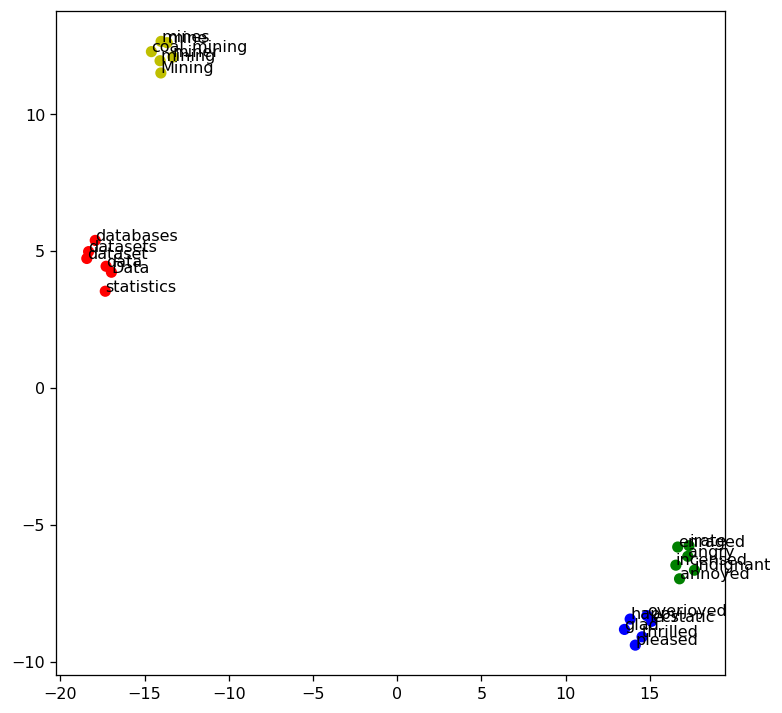

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

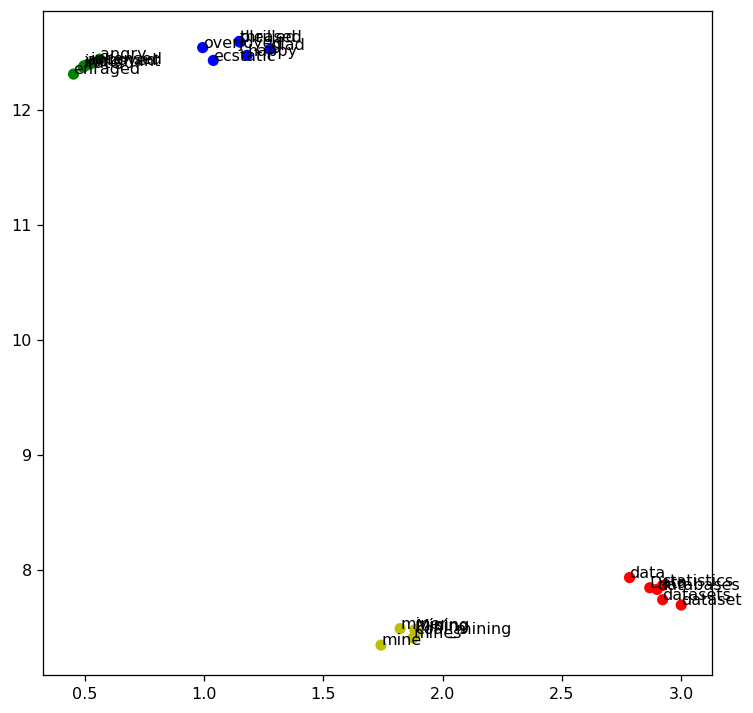

In [62]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


---
##### <a id='toc1_13_2_1_1_'></a>[**>>> Exercise 8 (Take home):**](#toc0_)

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

In [102]:
# Answer here
# Define emotion seed words
emotion_list = ['angry', 'happy', 'sad', 'fear']
topn = 14   # number of most similar words to fetch

# Collect related words for each emotion
angry_words = ['angry'] + [w for w, s in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [w for w, s in w2v_google_model.most_similar('happy', topn=topn)]
sad_words   = ['sad']   + [w for w, s in w2v_google_model.most_similar('sad',   topn=topn)]
fear_words  = ['fear']  + [w for w, s in w2v_google_model.most_similar('fear',  topn=topn)]

# Combine all words (4 groups × 16 words each)
target_words = angry_words + happy_words + sad_words + fear_words

# Create color labels for plotting (one color per emotion)
cn = topn + 1
color = ['r'] * cn + ['b'] * cn + ['y'] * cn + ['g'] * cn

print('\ntarget words: ')
print(target_words)
print(f"Total words: {len(target_words)}")



target words: 
['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried']
Total words: 60


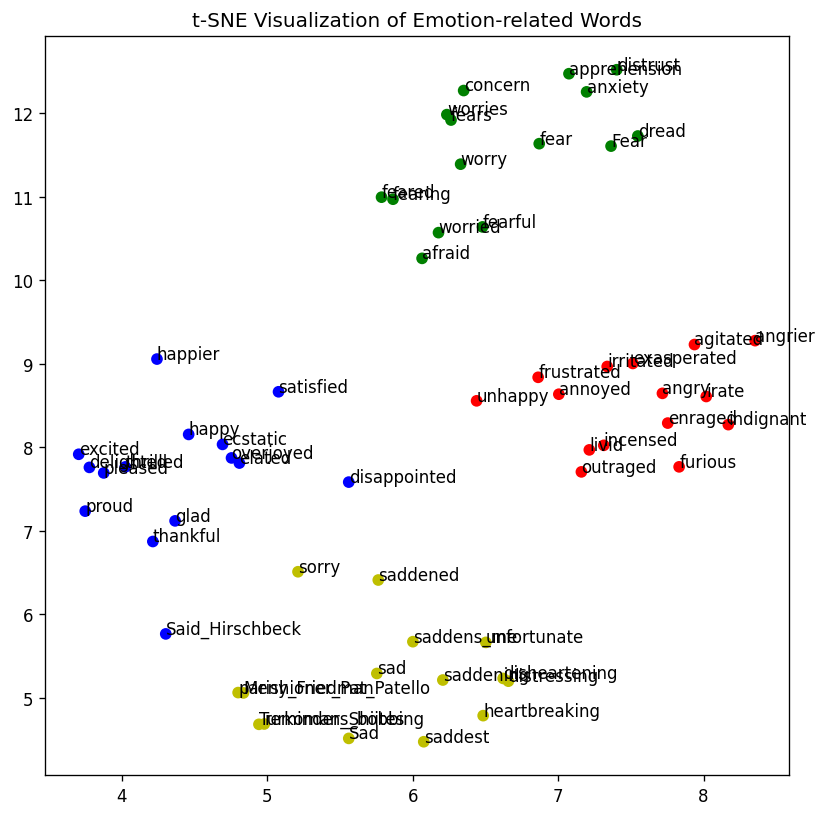

In [103]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Prepare word vectors
model = w2v_google_model
X_train = model[target_words]

# Run t-SNE
tsne = TSNE(n_components=2, metric='cosine', random_state=28)
X_tsne = tsne.fit_transform(X_train)

# Plot
plt.figure(figsize=(8, 8), dpi=120)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:, 0], X_tsne[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.title("t-SNE Visualization of Emotion-related Words")
plt.show()


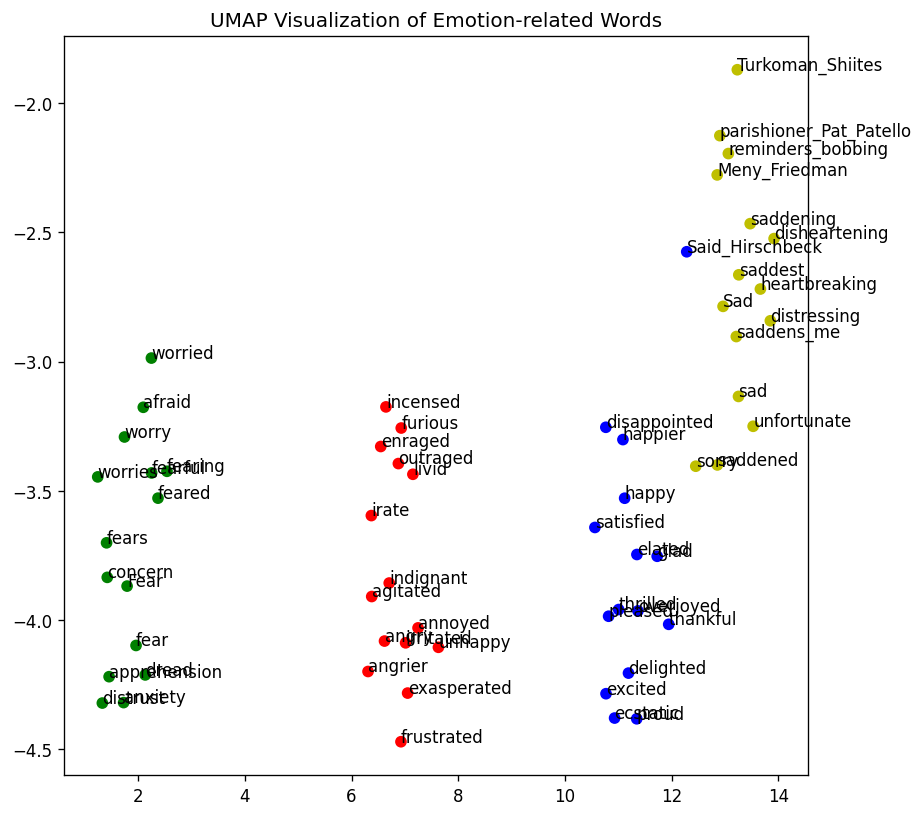

In [104]:
import umap.umap_ as umap

# Run UMAP
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)
X_umap = umap_model.fit_transform(X_train)

# Plot
plt.figure(figsize=(8, 8), dpi=120)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=color)
for label, x, y in zip(target_words, X_umap[:, 0], X_umap[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.title("UMAP Visualization of Emotion-related Words")
plt.show()


In [105]:
"""
Both t-SNE and UMAP successfully cluster semantically related emotion words.
In the t-SNE plot, clusters are compact but globally scattered:
the “angry” group (red) — words like furious, irate, annoyed — forms a tight cluster;
the “happy” group (blue) — delighted, excited, satisfied — appears in the lower-left region;
the “sad” (yellow) and “fear” (green) clusters slightly overlap.
UMAP, on the other hand, produces a smoother and more structured layout.
Four emotion groups are clearly separated, preserving both local and global relationships.
Overall, t-SNE emphasizes local compactness while UMAP offers
a more balanced and interpretable global semantic structure.
"""


'\nBoth t-SNE and UMAP successfully cluster semantically related emotion words.\nIn the t-SNE plot, clusters are compact but globally scattered:\nthe “angry” group (red) — words like furious, irate, annoyed — forms a tight cluster;\nthe “happy” group (blue) — delighted, excited, satisfied — appears in the lower-left region;\nthe “sad” (yellow) and “fear” (green) clusters slightly overlap.\nUMAP, on the other hand, produces a smoother and more structured layout.\nFour emotion groups are clearly separated, preserving both local and global relationships.\nOverall, t-SNE emphasizes local compactness while UMAP offers\na more balanced and interpretable global semantic structure.\n'

---